In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import sys
import os
import pandas as pd
from PIL import Image, ImageEnhance
import random

### Making csv from images

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image


In [ ]:
train_path_notumor = "/content/drive/MyDrive/MLProject/Dataset/Training/notumor/"
train_path_glioma = "/content/drive/MyDrive/MLProject/Dataset/Training/glioma/"
train_path_meningioma = "/content/drive/MyDrive/MLProject/Dataset/Training/meningioma/"
train_path_pituitary = "/content/drive/MyDrive/MLProject/Dataset/Training/pituitary/"
train_notumor_imgs = os.listdir(train_path_notumor)
train_glioma_imgs = os.listdir(train_path_glioma)
train_meningioma_imgs = os.listdir(train_path_meningioma)
train_pituitary_imgs = os.listdir(train_path_pituitary)

print(len(train_notumor_imgs))
print(len(train_glioma_imgs))
print(len(train_meningioma_imgs))
print(len(train_pituitary_imgs))

In [ ]:
model = ResNet50(weights='imagenet', include_top=False)
img_base_path = "/content/drive/MyDrive/MLProject/Dataset/Training/"

In [ ]:
# Function to extract features from an image
def imgFeatures (path):
  img = image.load_img(path, target_size=(100, 100))
  img = augment_image(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)
  FlatFeatures = features.ravel()
  return FlatFeatures

In [ ]:
# Extracting features of all images in the class notumor
X = []
i = 0
l = len(train_notumor_imgs)
for name in train_notumor_imgs:
  i+=1
  X.append(imgFeatures(img_base_path+"notumor/"+name))
  print(i,"/",l)
df = pd.DataFrame(X)
df.to_csv("/content/drive/MyDrive/MLProject/Train_notumor_resnet.csv")

In [ ]:
# Extracting features of all images in the class glioma
X1 = []
i = 0
l = len(train_glioma_imgs)
for name in train_glioma_imgs:
  i+=1
  X1.append(imgFeatures(img_base_path+"glioma/"+name))
  print(i,"/",l)

df1 = pd.DataFrame(X1)
df1.to_csv("/content/drive/MyDrive/MLProject/Train_glioma_resnet.csv")

In [ ]:
# Extracting features of all images in the class meningioma
X2 = []
i = 0
l = len(train_meningioma_imgs)
for name in train_meningioma_imgs:
  i+=1
  X2.append(imgFeatures(img_base_path+"meningioma/"+name))
  print(i,"/",l)

df2 = pd.DataFrame(X2)
df2.to_csv("/content/drive/MyDrive/MLProject/Train_meningioma_resnet.csv")

In [ ]:
# Extracting features of all images in the class pituitary
X3 = []
i = 0
l = len(train_pituitary_imgs)
for name in train_pituitary_imgs:
  i+=1
  X3.append(imgFeatures(img_base_path+"pituitary/"+name))
  print(i,"/",l)

df3 = pd.DataFrame(X3)
df3.to_csv("/content/drive/MyDrive/MLProject/Train_pituitary_resnet.csv")

### Reading features from saved csv

In [ ]:
df_notumor = pd.read_csv('/content/drive/MyDrive/MLProject/Train_notumor_resnet.csv')


In [ ]:
df_glioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_glioma_resnet.csv')


In [ ]:
df_meningioma = pd.read_csv('/content/drive/MyDrive/MLProject/Train_meningioma_resnet.csv')


In [ ]:
df_pituitary = pd.read_csv('/content/drive/MyDrive/MLProject/Train_pituitary_resnet.csv')


In [ ]:
print(df_notumor.shape)
print(df_glioma.shape)
print(df_meningioma.shape)
print(df_pituitary.shape)

(1595, 32769)
(1321, 32769)
(1339, 32769)
(1457, 32769)


## Making Dataset

In [ ]:
# Making labels
lst1 = [0 for i in range(1595)]
lst2 = [1 for i in range(1321)]
lst3 = [2 for i in range(1339)]
lst4 = [3 for i in range(1457)]
lst = lst1+lst2+lst3+lst4
df_labels = pd.DataFrame(lst)
df_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
5707,3
5708,3
5709,3
5710,3


In [ ]:
# Combine test data
df_combined_test = pd.DataFrame()
df_combined_test=df_combined_test.append(df_notumor,ignore_index=True)
df_combined_test=df_combined_test.append(df_glioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_meningioma,ignore_index=True)
df_combined_test=df_combined_test.append(df_pituitary,ignore_index=True)

# Remove "Unnamed" column
df_combined_test = df_combined_test.loc[:, ~df_combined_test.columns.str.contains('^Unnamed')]

#Print
df_combined_test

,0,1,2,3,4,5,6,7,8,9,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.085479,0.0,0.0,0.0,0.0,0.339628,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.101119,0.0,0.0,0.0,0.0,0.019530,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.440342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.275567,0.0,0.0,0.0,0.0,0.253405,0.0,0.0,0.0,0.0
5708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041544,0.0,0.0,0.0,0.0,0.147672,0.0,0.0,0.0,0.0
5709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039200,0.0,0.0,0.0,0.0,0.100638,0.0,0.0,0.0,0.0
5710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177543,0.0,0.0,0.0,0.0,0.128627,0.0,0.0,0.0,0.0


### Read/Write

In [ ]:
# removing zero variance features before writing
sel = VarianceThreshold(threshold=0)
df_combined_testNparray = sel.fit_transform(df_combined_test)
df_combined_test = pd.DataFrame(df_combined_testNparray)
# df_combined_testN,df_labels
df_combined_test.to_csv("/content/drive/MyDrive/MLProject/df_combined_test_resnet.csv")
df_labels.to_csv("/content/drive/MyDrive/MLProject/df_labels_resnet.csv")

In [ ]:
df_combined_test=pd.read_csv("/content/drive/MyDrive/MLProject/df_combined_test_resnet.csv")
df_labels=pd.read_csv("/content/drive/MyDrive/MLProject/df_labels_resnet.csv")

### PCA

|params|shape|
|--|--|
|`n_components = 0.9`|5712 rows × 74 columns|

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_combined_test = scaler.fit_transform(df_combined_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
pca.fit(df_combined_test)
df_combined_testN = pca.transform(df_combined_test)


In [ ]:
pca.explained_variance_

array([35.21213985,  8.19891331,  5.95351484,  5.42175209,  4.45935929,
        3.13260898,  1.83231394,  1.57481586,  1.53821131,  1.23176242,
        1.15678072,  1.01799573,  0.99691026,  0.84557778,  0.79518484,
        0.6885282 ,  0.65926515,  0.61866599,  0.56894531,  0.52613816,
        0.49264675,  0.47574812,  0.42289782,  0.42042733,  0.39594594,
        0.37885376,  0.35627964,  0.34448571,  0.29048681,  0.28118283,
        0.26005789,  0.25739853,  0.23844368,  0.23189436,  0.22479663,
        0.21508542,  0.21132094,  0.20371086,  0.1848711 ,  0.18291889,
        0.18070394,  0.17714565,  0.1630281 ,  0.16113701,  0.15728034,
        0.15460175,  0.14919573,  0.14593354,  0.14148261,  0.13559052,
        0.13428503,  0.13252281,  0.12324785,  0.12153044,  0.11738651,
        0.11480239,  0.11403621,  0.11233793,  0.11065449,  0.10700911,
        0.1053099 ,  0.10345921,  0.10027578,  0.09659301,  0.09557547,
        0.09201823,  0.08829573,  0.08715215,  0.08556151,  0.08

In [ ]:
df_combined_testN = pd.DataFrame(df_combined_testN)
df_combined_testN

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,6.197134,-2.652991,-0.446177,2.763846,-2.747282,-2.758440,-1.919421,0.080321,1.381701,0.419185,...,-0.362054,-0.043401,0.201737,0.345790,-0.226468,0.237381,0.241122,0.046067,0.000492,-0.062624
1,3.641934,-3.972996,-1.861390,2.242881,0.633068,-1.027284,0.408892,-1.540028,-0.144035,-0.621013,...,0.340259,-0.057259,-0.052237,0.099398,0.508803,-0.251926,-0.203599,-0.223379,-0.405730,-0.043960
2,16.759478,0.335985,6.274524,-2.168454,3.303025,0.171111,3.877205,-0.698127,-1.521122,-1.149149,...,-0.451381,0.834168,0.749576,1.073348,0.974423,-0.319639,0.287009,-1.240637,-1.506940,1.081705
3,-1.683221,-6.568659,1.188297,-2.673211,2.124410,-1.535659,0.091794,1.188179,-1.613435,0.969695,...,-0.500016,-0.226855,0.001196,0.239350,0.012402,-0.407622,0.111688,0.112383,-0.150355,-0.568604
4,5.000081,-2.861176,-2.566096,3.170142,4.017889,0.902752,-0.569553,1.072623,0.472495,-0.562897,...,0.209729,0.106791,0.836997,-0.215089,-0.306702,-0.221429,0.004294,-0.153042,-0.410583,-0.277379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,-4.143526,-0.617140,0.027110,-3.732928,-1.373281,3.026227,1.539503,-2.156981,1.037891,1.142408,...,0.351628,-0.467461,-0.049304,-0.563258,0.575455,0.117023,-0.284839,0.565444,-0.192336,-0.088474
5708,1.606177,-1.273362,-2.082959,-0.381430,-2.649734,-1.631321,0.413088,-0.456829,0.473299,-0.300515,...,0.091952,-0.036406,0.009695,-0.054388,-0.064581,0.022004,-0.287325,-0.064035,0.148195,0.078537
5709,-2.055596,0.729531,-1.689922,-1.982125,-1.101252,0.508746,0.654102,0.586794,1.052962,-0.318693,...,0.153791,0.401330,-0.199381,0.140213,0.264972,0.223402,-0.456983,0.080998,0.060586,-0.010355
5710,1.187993,2.464622,-3.218038,-1.382729,1.821405,0.664796,0.529680,-1.261731,1.698119,-1.192584,...,-0.197365,-0.285409,0.295220,0.146769,-0.031307,-0.289163,-0.152850,0.009088,0.251129,-0.023870


### Data Pre-processing

In [ ]:
""" Normalise """
scaler = MinMaxScaler()
scaler.fit(df_combined_test)
df_combined_test = pd.DataFrame(scaler.transform(df_combined_test))
df_combined_test


,0,1,2,3,4,5,6,7,8,9,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.140575,0.0,0.0,0.0,0.0,0.343372,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166295,0.0,0.0,0.0,0.0,0.019746,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.445196,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.453183,0.0,0.0,0.0,0.0,0.256198,0.0,0.0,0.0,0.0
5708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068322,0.0,0.0,0.0,0.0,0.149300,0.0,0.0,0.0,0.0
5709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064467,0.0,0.0,0.0,0.0,0.101748,0.0,0.0,0.0,0.0
5710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.291978,0.0,0.0,0.0,0.0,0.130045,0.0,0.0,0.0,0.0


In [ ]:
## Reducing the features using variance threshold
sel = VarianceThreshold(threshold=0)
df_combined_testNparray = sel.fit_transform(df_combined_test)
print(df_combined_testNparray)
df_combined_testN = pd.DataFrame(df_combined_testNparray)
df_combined_testN

[[0.70193005 6.0701504  0.8465135  ... 3.6453662  0.08547926 0.33962822]
 [0.6940782  6.171954   0.7887964  ... 3.2953658  0.10111892 0.0195303 ]
 [1.8721218  6.271553   1.3113104  ... 4.6341577  0.         0.44034195]
 ...
 [0.8018112  6.2442865  0.59349775 ... 3.1042519  0.03920019 0.10063839]
 [0.8645673  6.288064   0.80425346 ... 3.1012788  0.17754269 0.1286273 ]
 [0.6857133  6.302926   0.6535356  ... 3.4957752  0.08896136 0.25526118]]


,0,1,2,3,4,5,6,7,8,9,...,7589,7590,7591,7592,7593,7594,7595,7596,7597,7598
0,0.701930,6.070150,0.846514,0.0,4.552460,0.0,5.965653,4.322859,0.138089,0.953341,...,0.000000,0.0,0.764007,4.295002,0.475493,0.000000,2.442699,3.645366,0.085479,0.339628
1,0.694078,6.171954,0.788796,0.0,4.475046,0.0,6.139335,4.344844,0.330790,1.307513,...,0.000000,0.0,0.663088,4.523087,0.333541,0.000000,2.416706,3.295366,0.101119,0.019530
2,1.872122,6.271553,1.311310,0.0,3.841414,0.0,7.153886,3.352575,1.133025,1.436075,...,0.078309,0.0,0.773578,4.485025,0.242887,0.299034,1.320454,4.634158,0.000000,0.440342
3,1.070785,7.100814,0.686295,0.0,3.483595,0.0,5.884483,4.526837,0.364378,1.462600,...,0.000000,0.0,0.551716,4.585007,0.135742,0.000000,1.624760,2.686280,0.000000,0.000000
4,0.984705,6.393397,1.265070,0.0,3.984947,0.0,6.441714,5.168624,0.082692,0.987659,...,0.000000,0.0,1.036403,4.433808,0.339141,0.000000,2.465806,2.653341,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.925513,6.912308,0.515470,0.0,3.602174,0.0,5.622338,3.949709,0.469184,1.534195,...,0.000000,0.0,0.987790,4.354013,0.330001,0.000000,2.128612,3.116852,0.275567,0.253405
5708,0.728155,6.095565,0.694803,0.0,4.587556,0.0,6.009157,4.293666,0.236920,1.094119,...,0.000000,0.0,0.665929,4.213789,0.445591,0.000000,2.256165,3.301369,0.041544,0.147672
5709,0.801811,6.244287,0.593498,0.0,4.306854,0.0,6.225301,3.980679,0.499141,1.250086,...,0.000000,0.0,0.796396,4.259317,0.402184,0.000000,2.147342,3.104252,0.039200,0.100638
5710,0.864567,6.288064,0.804253,0.0,4.567446,0.0,6.375040,4.318207,0.423782,1.211567,...,0.000000,0.0,0.930342,4.383197,0.435543,0.000000,2.247967,3.101279,0.177543,0.128627


### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_combined_testN,df_labels,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4284, 7599)
(4284, 1)
(1428, 7599)
(1428, 1)


In [ ]:
#For printing reports for the model
def print_reports(model):
  predictedy_test=model.predict(X_test)
  conf_mat = confusion_matrix(y_test, predictedy_test)
  acc_scr = accuracy_score(y_test, predictedy_test)
  print("Accuracy Score = ",acc_scr)
  print("clf rprt =\n",classification_report(y_test,predictedy_test))
  print("\nConfusion Matrix")
  disp=ConfusionMatrixDisplay(conf_mat)
  disp.plot()

### Decision tree clf

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.7100840336134454|
|var thresh = 0|0.7016806722689075|
|var thresh = 0.01|0.7177871148459384|
|PCA 0.9|0.6939775910364145|


Accuracy Score =  0.7016806722689075
clf rprt =
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       408
           1       0.61      0.60      0.60       332
           2       0.53      0.56      0.54       328
           3       0.78      0.76      0.77       360

    accuracy                           0.70      1428
   macro avg       0.69      0.69      0.69      1428
weighted avg       0.71      0.70      0.70      1428


Confusion Matrix


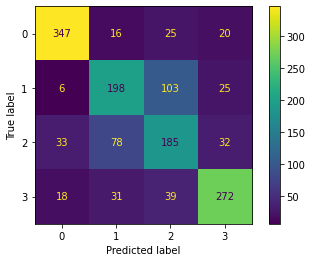

In [ ]:
#Create an instance of decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=0)

#fit the model
clf_dt.fit(X_train,y_train.values.ravel())

#print report
print_reports(clf_dt)

### Random Forest

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.8235294117647058|
|var thresh = 0|0.8088235294117647|
|var thresh = 0.01|0.811624649859944|
|PCA 0.9|**0.8298319327731093**|

Accuracy Score =  0.8088235294117647
clf rprt =
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       408
           1       0.77      0.69      0.73       332
           2       0.69      0.64      0.66       328
           3       0.81      0.93      0.87       360

    accuracy                           0.81      1428
   macro avg       0.80      0.80      0.80      1428
weighted avg       0.81      0.81      0.81      1428


Confusion Matrix


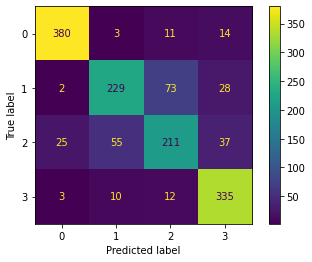

In [ ]:
#Create an instance of random forest classifier
clf_rf = RandomForestClassifier(random_state=0)

#fit the model
clf_rf.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf)

|params|accuracy|
|--|--|
|Normalized, var thresh = 0.01|0.8235294117647058|
|var thresh = 0|0.8256302521008403|
|var thresh = 0.01|0.8200280112044818|
|PCA 0.9|**0.8312324929971989**|


Accuracy Score =  0.8256302521008403
clf rprt =
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       408
           1       0.80      0.72      0.76       332
           2       0.73      0.64      0.68       328
           3       0.81      0.96      0.87       360

    accuracy                           0.83      1428
   macro avg       0.82      0.82      0.81      1428
weighted avg       0.82      0.83      0.82      1428


Confusion Matrix


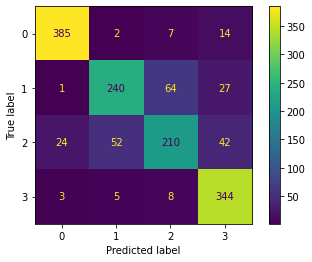

In [ ]:
#Create an instance of random forest classifier
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)

#fit the model
clf_rf1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(clf_rf1)

### SVM

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.8627450980392157|
|var thresh = 0|**0.8802521008403361**|
|var thresh = 0.01|0.8795518207282913|
|PCA 0.9|0.7997198879551821|


Accuracy Score =  0.8802521008403361
clf rprt =
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       408
           1       0.83      0.85      0.84       332
           2       0.80      0.74      0.77       328
           3       0.93      0.96      0.95       360

    accuracy                           0.88      1428
   macro avg       0.87      0.87      0.87      1428
weighted avg       0.88      0.88      0.88      1428


Confusion Matrix


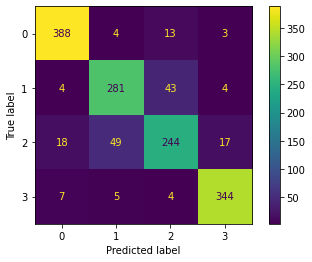

In [ ]:
#Create an instance of svm
svm_model1 = SVC(kernel = "linear", C=2.2)

#fit the model
svm_model1.fit(X_train,y_train.values.ravel())

#Print report
print_reports(svm_model1)

### ExtraTreesClassifier


|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.8333333333333334|
|var thresh = 0|0.8249299719887955|
|var thresh = 0.01|0.8368347338935574|
|PCA 0.9|0.834733893557423|

Accuracy Score =  0.8333333333333334
clf rprt =
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       408
           1       0.80      0.74      0.77       332
           2       0.74      0.67      0.70       328
           3       0.83      0.95      0.89       360

    accuracy                           0.83      1428
   macro avg       0.82      0.82      0.82      1428
weighted avg       0.83      0.83      0.83      1428


Confusion Matrix


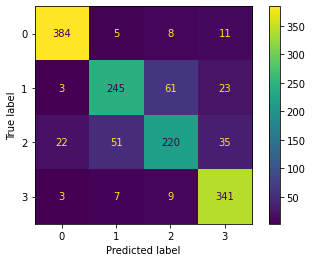

In [ ]:
#Create an instance of Extra Trees Classifier
ExtraTreesClassifier_m = ExtraTreesClassifier()

#fit the model
ExtraTreesClassifier_m.fit(X_train,y_train.values.ravel())

#Print Report
print_reports(ExtraTreesClassifier_m)

### AdaBoostClassifier


|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.696078431372549|
|var thresh = 0|0.6855742296918768|
|var thresh = 0.01|0.6799719887955182|
|PCA 0.9|0.6673669467787114|

Accuracy Score =  0.6855742296918768
clf rprt =
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       408
           1       0.58      0.70      0.63       332
           2       0.46      0.38      0.41       328
           3       0.76      0.76      0.76       360

    accuracy                           0.69      1428
   macro avg       0.67      0.67      0.67      1428
weighted avg       0.68      0.69      0.68      1428


Confusion Matrix


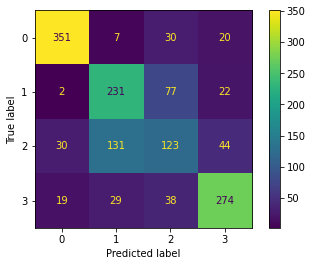

In [ ]:
#Create an instance of AdaBoost
AdaBoostClassifier_model = AdaBoostClassifier()

#fit the model
AdaBoostClassifier_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(AdaBoostClassifier_model)

### Naïve Bayes

|params|accuracy|
|---|---|
|Normalized, var thresh = 0.01|0.5889355742296919|
|var thresh = 0|0.5889355742296919|
|var thresh = 0.01|0.5791316526610645|
|PCA 0.9|0.6050420168067226|

Accuracy Score =  0.5889355742296919
clf rprt =
               precision    recall  f1-score   support

           0       0.82      0.48      0.60       408
           1       0.51      0.85      0.64       332
           2       0.40      0.22      0.28       328
           3       0.63      0.81      0.71       360

    accuracy                           0.59      1428
   macro avg       0.59      0.59      0.56      1428
weighted avg       0.61      0.59      0.57      1428


Confusion Matrix


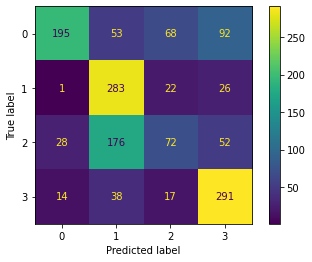

In [ ]:
#Create an instance of Gaussian Naive Bayes
GaussianNB_model = GaussianNB()

#fit the model
GaussianNB_model.fit(X_train,y_train.values.ravel())

#Print report
print_reports(GaussianNB_model)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
svm_model1 = SVC(kernel = "linear", C=2.2)
clf_rf1 = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=220)
AdaBoostClassifier_model = AdaBoostClassifier()

In [ ]:
print("SVM vs Guassian")
t, p = paired_ttest_5x2cv(estimator1=AdaBoostClassifier_model, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')
 
print("SVM vs Guassian")
t, p = paired_ttest_5x2cv(estimator1=clf_rf1, estimator2=svm_model1, X=df_combined_testN, y=df_labels.to_numpy().ravel(),scoring = "accuracy", random_seed=42)
print(f"t statistic: {t}, p-value: {p}\n")

if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

SVM vs Guassian
t statistic: -16.365209552034738, p-value: 1.5540928264935855e-05

Difference between mean performance is probably real
SVM vs Guassian
t statistic: -14.733575970197027, p-value: 2.6035331497037686e-05

Difference between mean performance is probably real
